In [317]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())
from tslb.src.lzw import *
from tslb.src.utils import *
from tslb.src.regModel import regModel as regModel

plt.rcParams.update({'font.size': 14})

In [330]:
df1 = pd.read_csv("../data/bitcoin-paper-data/price-data-02-15-2014-06-11-2014.csv")
df2 = pd.read_csv("../data/bitcoin-paper-data/price-data-11-30-2014-04-28-2015.csv")
df3 = pd.read_csv("../data/bitcoin-paper-data/price-data-12-17-2015-06-30-2016.csv")

# df = pd.concat([df1[['timestamp', 'ask', 'bid']], df2[['timestamp', 'ask', 'bid']], df3[['timestamp', 'ask', 'bid']]], axis=0)
df = df2
df['time'] = pd.to_datetime(df['timestamp'],unit='s')
df['price'] = 0.5* (df.ask+df.bid)

In [331]:
data = df[['timestamp','price']]
data.index = pd.to_datetime(data['timestamp'], unit='s')

In [351]:
y_t = data.shift(-1).price - data.price
x_t = pd.Series(index = y_t.index, dtype=int)
x_t[y_t == 0] = 0
x_t[y_t > 0] = 1
x_t[y_t < 0] = -1

In [333]:
x_t.resample("5S")

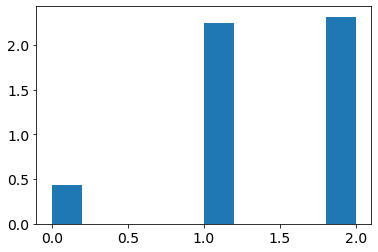

In [336]:
plt.hist(x_t, density=True)
plt.show()

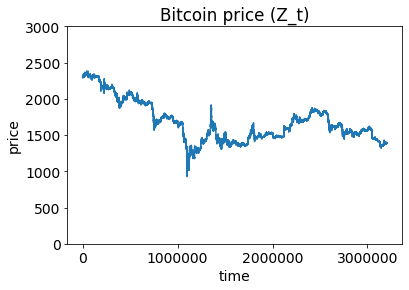

In [361]:
plt.title("Bitcoin price (Z_t)")
plt.plot(df.price.values)
plt.ylim(0,3000)
plt.xlabel("time")
plt.ylabel("price")
plt.show()

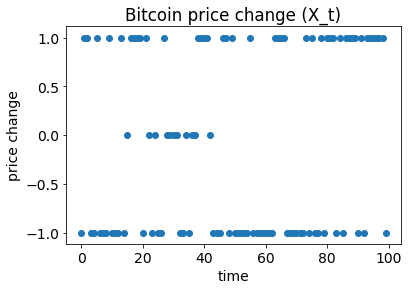

In [352]:
plt.title("Bitcoin price change (X_t)")
plt.scatter(np.arange(100),x_t[:100])
plt.xlabel("time")
plt.ylabel("price change")
plt.show()

In [308]:
train = x_t[(x_t.index > pd.to_datetime("12/1/2014"))&(x_t.index < pd.to_datetime("12/31/2014"))]
val = x_t[(x_t.index > pd.to_datetime("1/1/2015"))&(x_t.index < pd.to_datetime("1/15/2015"))]
test = x_t[(x_t.index > pd.to_datetime("1/16/2015"))&(x_t.index < pd.to_datetime("3/30/2015"))]

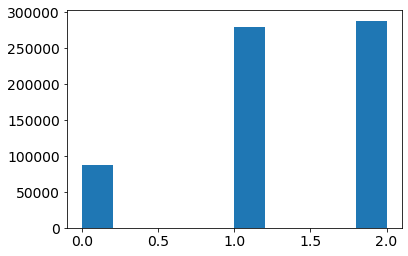

In [325]:
plt.hist(train)
plt.show()

In [328]:
x_t

timestamp
2014-11-30 00:00:01    2
2014-11-30 00:00:04    1
2014-11-30 00:00:06    1
2014-11-30 00:00:10    2
2014-11-30 00:00:13    2
                      ..
2015-04-28 23:59:46    2
2015-04-28 23:59:49    1
2015-04-28 23:59:51    1
2015-04-28 23:59:54    1
2015-04-28 23:59:57    0
Length: 3206608, dtype: int64

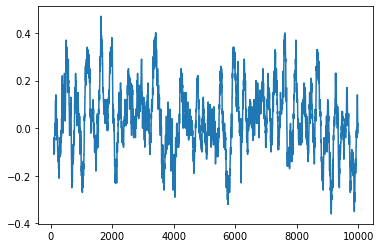

In [289]:
plt.plot(x_t.rolling(100).mean().values[:10000])

In [310]:
n = 3
samples = 100
size = 2 ** 14
#############

myRegModel = regModel(n, size, samples)
myRegModel.fit(plot=False)

lbs=[]
for i in np.arange(1,len(train)-size, size):
    uncomp_numbers = train[i:i+size].values
    ratio = lzw_compression_ratio(uncomp_numbers, n)
    ent = myRegModel.get_entropy(ratio, "a multinomial sequence", False)
    lb = h_inverse(ent, n, a=0.001)
    lbs.append(lb)

compression ratio:  0.1422119140625
compression ratio:  0.148681640625
compression ratio:  0.157958984375
compression ratio:  0.16351318359375
compression ratio:  0.16583251953125
compression ratio:  0.1585693359375
compression ratio:  0.15887451171875
compression ratio:  0.16259765625
compression ratio:  0.16876220703125
compression ratio:  0.160400390625
compression ratio:  0.15069580078125
compression ratio:  0.15606689453125
compression ratio:  0.14630126953125
compression ratio:  0.14410400390625
compression ratio:  0.1507568359375
compression ratio:  0.1478271484375
compression ratio:  0.14996337890625
compression ratio:  0.157958984375
compression ratio:  0.15582275390625
compression ratio:  0.14306640625
compression ratio:  0.14837646484375
compression ratio:  0.14984130859375
compression ratio:  0.14349365234375
compression ratio:  0.151123046875
compression ratio:  0.15087890625
compression ratio:  0.153564453125
compression ratio:  0.15240478515625
compression ratio:  0.1519

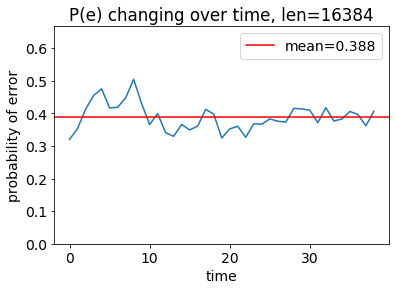

In [318]:
plt.title("P(e) changing over time, len={}".format(size))
plt.plot(lbs)
plt.axhline(np.mean(lbs), color="red", label="mean={}".format(np.mean(lbs).round(3)))
plt.xlabel("time")
plt.ylim(0,0.666)
plt.ylabel("probability of error")

plt.legend()
plt.savefig("result/bitcoin_{}.pdf".format(size), format='pdf')
plt.show()

In [319]:
n = 3
samples = 100
size = 2 ** 12
#############

myRegModel = regModel(n, size, samples)
myRegModel.fit(plot=False)

lbs=[]
for i in np.arange(1,len(train)-size, size):
    uncomp_numbers = train[i:i+size].values
    ratio = lzw_compression_ratio(uncomp_numbers, n)
    ent = myRegModel.get_entropy(ratio, "a multinomial sequence", False)
    lb = h_inverse(ent, n, a=0.001)
    lbs.append(lb)

compression ratio:  0.17431640625
compression ratio:  0.171630859375
compression ratio:  0.182373046875
compression ratio:  0.176025390625
compression ratio:  0.176025390625
compression ratio:  0.178955078125
compression ratio:  0.183837890625
compression ratio:  0.193603515625
compression ratio:  0.19189453125
compression ratio:  0.1875
compression ratio:  0.196044921875
compression ratio:  0.202392578125
compression ratio:  0.20556640625
compression ratio:  0.206298828125
compression ratio:  0.201416015625
compression ratio:  0.189697265625
compression ratio:  0.2021484375
compression ratio:  0.208984375
compression ratio:  0.20361328125
compression ratio:  0.1962890625
compression ratio:  0.1806640625
compression ratio:  0.19384765625
compression ratio:  0.20068359375
compression ratio:  0.19970703125
compression ratio:  0.2041015625
compression ratio:  0.186279296875
compression ratio:  0.193115234375
compression ratio:  0.19873046875
compression ratio:  0.2001953125
compression ra

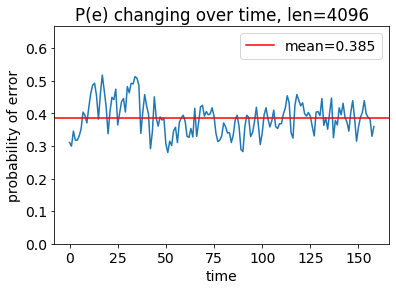

In [320]:
plt.title("P(e) changing over time, len={}".format(size))
plt.plot(lbs)
plt.axhline(np.mean(lbs), color="red", label="mean={}".format(np.mean(lbs).round(3)))
plt.xlabel("time")
plt.ylim(0,0.666)
plt.ylabel("probability of error")

plt.legend()
plt.savefig("result/bitcoin_{}.pdf".format(size), format='pdf')
plt.show()

In [323]:
n = 3
samples = 100
size = 2 ** 10
#############

myRegModel = regModel(n, size, samples)
myRegModel.fit(plot=False)

lbs=[]
for i in np.arange(1,len(train)-size, size):
    uncomp_numbers = train[i:i+size].values
    ratio = lzw_compression_ratio(uncomp_numbers, n)
    ent = myRegModel.get_entropy(ratio, "a multinomial sequence", False)
    lb = h_inverse(ent, n, a=0.001)
    lbs.append(lb)

compression ratio:  0.2275390625
compression ratio:  0.2236328125
compression ratio:  0.220703125
compression ratio:  0.228515625
compression ratio:  0.212890625
compression ratio:  0.22265625
compression ratio:  0.2265625
compression ratio:  0.2265625
compression ratio:  0.2294921875
compression ratio:  0.2412109375
compression ratio:  0.240234375
compression ratio:  0.2177734375
compression ratio:  0.2216796875
compression ratio:  0.232421875
compression ratio:  0.21875
compression ratio:  0.2294921875
compression ratio:  0.2216796875
compression ratio:  0.2294921875
compression ratio:  0.2216796875
compression ratio:  0.23046875
compression ratio:  0.2373046875
compression ratio:  0.23828125
compression ratio:  0.2314453125
compression ratio:  0.2216796875
compression ratio:  0.234375
compression ratio:  0.2353515625
compression ratio:  0.232421875
compression ratio:  0.2392578125
compression ratio:  0.24609375
compression ratio:  0.25390625
compression ratio:  0.2509765625
compress

compression ratio:  0.228515625
compression ratio:  0.2236328125
compression ratio:  0.2333984375
compression ratio:  0.2197265625
compression ratio:  0.2333984375
compression ratio:  0.2314453125
compression ratio:  0.2333984375
compression ratio:  0.236328125
compression ratio:  0.248046875
compression ratio:  0.236328125
compression ratio:  0.2470703125
compression ratio:  0.2451171875
compression ratio:  0.2490234375
compression ratio:  0.22265625
compression ratio:  0.22265625
compression ratio:  0.228515625
compression ratio:  0.23046875
compression ratio:  0.2314453125
compression ratio:  0.2392578125
compression ratio:  0.2509765625
compression ratio:  0.2265625
compression ratio:  0.2333984375
compression ratio:  0.2177734375
compression ratio:  0.232421875
compression ratio:  0.23828125
compression ratio:  0.208984375
compression ratio:  0.22265625
compression ratio:  0.236328125
compression ratio:  0.2353515625
compression ratio:  0.22265625
compression ratio:  0.2392578125


compression ratio:  0.21484375
compression ratio:  0.23828125
compression ratio:  0.2294921875
compression ratio:  0.2353515625
compression ratio:  0.2392578125
compression ratio:  0.2412109375
compression ratio:  0.236328125
compression ratio:  0.24609375
compression ratio:  0.251953125
compression ratio:  0.23046875
compression ratio:  0.2470703125
compression ratio:  0.2470703125
compression ratio:  0.240234375
compression ratio:  0.2490234375
compression ratio:  0.255859375
compression ratio:  0.248046875
compression ratio:  0.259765625
compression ratio:  0.2548828125
compression ratio:  0.2568359375
compression ratio:  0.240234375
compression ratio:  0.2490234375
compression ratio:  0.2568359375
compression ratio:  0.2421875
compression ratio:  0.2568359375
compression ratio:  0.2431640625
compression ratio:  0.2353515625
compression ratio:  0.2431640625
compression ratio:  0.25390625
compression ratio:  0.244140625
compression ratio:  0.2333984375
compression ratio:  0.235351562

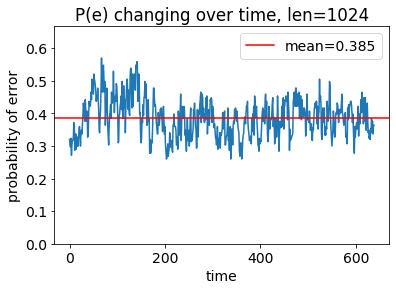

In [324]:
plt.title("P(e) changing over time, len={}".format(size))
plt.plot(lbs)
plt.axhline(np.mean(lbs), color="red", label="mean={}".format(np.mean(lbs).round(3)))
plt.xlabel("time")
plt.ylim(0,0.666)
plt.ylabel("probability of error")

plt.legend()
plt.savefig("result/bitcoin_{}.pdf".format(size), format='pdf')
plt.show()

In [208]:
x = -123
indicator = x
out = 0

while (indicator*x > 0):
    out = out*10
    a = x%10
    x = int((x - a)/10)
    out = out+a
    print(out)

7
77
778
7789
77899
778999
7789999
77899999
778999999
7789999999
77899999999
778999999999
7789999999999
77899999999999
778999999999999
7789999999999999
77899999999999999
778999999999999999
7789999999999999999
77899999999999999999
778999999999999999999
7789999999999999999999
77899999999999999999999
778999999999999999999999
7789999999999999999999999
77899999999999999999999999
778999999999999999999999999
7789999999999999999999999999
77899999999999999999999999999
778999999999999999999999999999
7789999999999999999999999999999
77899999999999999999999999999999
778999999999999999999999999999999
7789999999999999999999999999999999
77899999999999999999999999999999999
778999999999999999999999999999999999
7789999999999999999999999999999999999
77899999999999999999999999999999999999
778999999999999999999999999999999999999
7789999999999999999999999999999999999999
77899999999999999999999999999999999999999
778999999999999999999999999999999999999999
7789999999999999999999999999999999999999999
77899999999

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




778999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [236]:
nums=[1,1,2,2,2,2,3,4,5,5,5,6,7]
removeDuplicates(nums)

[1, 2, 3, 4, 5, 6, 7]

In [235]:
def removeDuplicates(nums):
    i = 0
    while len(nums) > i+1:
        while nums[i] - nums[i+1] == 0:
            nums.pop(i+1)
        i = i+1
    return nums

In [228]:
nums

[1, 2, 3, 4, 5, 6]

In [211]:
nums.pop(1)

1

In [213]:
nums.pop(1)

2

In [214]:
nums

[1]

In [367]:
num = 1
mydict ={2:2}
if num not in mydict:
    print(num)

1


In [362]:
nums = [1,3,5,79]

In [365]:
for i,num in enumerate(nums):
    print(i)
    print(num)
    print()

0
1

1
3

2
5

3
79

